In [1]:
import sys
assert sys.version_info >= (3, 5)

import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [2]:
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import os
os.getcwd()

'c:\\Users\\USER\\Documents\\LGhv_practice\\ML'

In [4]:
file_path = 'C:\\Users\\USER\\Documents\\LGhv_practice\\resource\\ml\\data/'

In [5]:
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

In [6]:
#이미지를 저장할 때 사용하기 위한 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
from matplotlib import font_manager, rc
import platform

#한글 출력을 위한 부분
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

#음수 출력을 위한 부분
mpl.rcParams['axes.unicode_minus'] = False

In [9]:
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

#그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수: 0.20 에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈령용 데이터가
# 자주 변경되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)


# 이진 분류, binary classification

## MNIST data 사용

In [51]:
# 데이터 다운로드
# 디셔너리 형태로 다운로드
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [56]:
#피처 와 타겟 가져오기
X, y = mnist['data'], mnist['target']
print(X.shape)
#데이터는 784 픽셀을 가진 흑백 이미지로 실제 크기는 28 * 28
#각 픽셀은 0 ~ 255 까지의 값
print(y.shape)

(70000, 784)
(70000,)


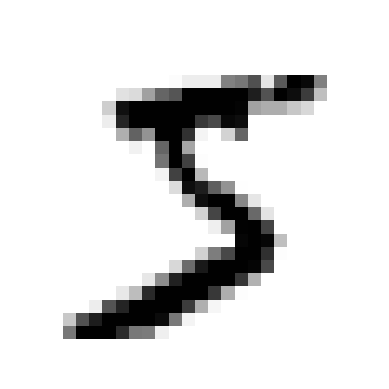

In [57]:
#하나의 이미지 출력
some_digit = X[0] # 이 이미지는 784 픽셀로 구성
some_digit_image = some_digit.reshape(28, 28) #2차원 이미지로 변환
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis('off')
plt.show()

In [32]:
#출력한 이미지의 레이블을 확인
print(y[0])

5


In [65]:
#여러 개의 이미지를 출력하기 위한 함수
#첫번째 매개변수는 이미지들
#두번째 매개변수는 하나의 행에 출력할 이미지의 수: 기본값은 10
#세번째 매개변수는 옵션으로 디셔너리를 설정
#여러 개의 옵션을 설정해야 하는 경우 
#각 매개변수를 나열하는 것은 함수의 가독성을 떨어뜨림
#이런 경우에는 매개변수를 하나로 묶어야 하는데 dict 나 class
#생략이 가능한 옵션을 많이 가지고 있으면 dict 가 낫고 그렇지 않으면 class 를 사용
def plot_digits(instances, images_per_row = 10, **options):
    #이미지 크기를 변수로 생성
    size = 28
    #행에 출력할 이미지의 개수를 설정
    images_per_row = min(len(instances), images_per_row)
    #이미지 크기 설정
    images = [instance.reshape(size, size) for instance in instances]
    #행의 개수를 출력
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    #이미지들을 저장할 리스트
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    
    #0으로 가득찬 행렬을 만들어서 row_images에 저장
    images.append(np.zeros((size * size * n_empty)))
    
    #행 단위로 순회하면서 실제 이미지를 추가
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row+1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

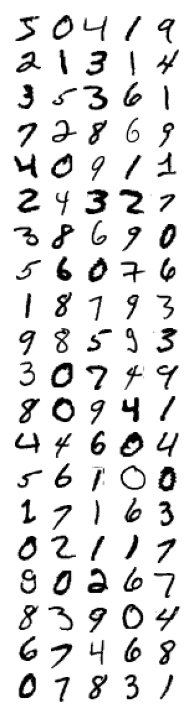

In [66]:
#함수 확인
#여러 개의 이미지 출력 함수 확인
plt.figure(figsize=(9, 9))
example_images = X[:100]
plot_digits(example_images, images_per_row=5)
plt.show()

In [67]:
#타겟의 자료형 확인: str
print(type(y[0]))
#범주형 데이터의 자료형은 정수를 권장
#타겟의 자료형 변경
#간혹 np.int 로 변경하는 경우가 있는데 numpy 버전이 변경되면서 없어짐
y = y.astype(np.uint8)
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


## 이진 분류를 위한 데이터 생성

In [68]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#이진 분류는 True 와 False 로 분류
#이진 분류의 경우는 Target 이 bool
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(y_train_5[0])
print(y_test_5[0])

True
False


## SGD Classifier(Stochastic Gradient Descent)

In [69]:
from sklearn.linear_model import SGDClassifier

#훈련에 사용할 모델을 생성 - 하이퍼 파라미터를 설정
#max_iter는 최대 반복 횟수
#tol은 정밀도
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

#훈련
sgd_clf.fit(X_train, y_train_5)

#예측 - feature는 2차원 배열이상이어야 합니다.
sgd_clf.predict([some_digit])

array([ True])

In [70]:
#k 겹 교차 검증
from sklearn.model_selection import cross_val_score
#3번 교차 검증을 수행하는데 평가 지표는 정확도
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95, 0.96, 0.96])

In [81]:
#새로운 분류기를 가지고 훈련하고 교차 검증
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.1  , 0.097, 0.1  ])

## 분류의 평가 지표

오차 행렬 출력

In [82]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [83]:
#확률적 경사 하강법 모델을 가지고 훈련 한 후 값을 예측
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
#오차 행렬 출력
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

## sklearn 평가 지표 계산

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:", accuracy_score(y_train_5, y_train_pred))
print("정밀도:", precision_score(y_train_5, y_train_pred))
print("재현율:", recall_score(y_train_5, y_train_pred))
print("f1_score:", f1_score(y_train_5, y_train_pred))

정확도: 0.9570333333333333
정밀도: 0.8370879772350012
재현율: 0.6511713705958311
f1_score: 0.7325171197343846


## 정밀도 재현율 trade off

In [87]:
#결정 임계값 - 기본값은 0
#자신의 점수를 출력 - 0보다 크기 때문에 True
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

#전체 훈련 데이터의 점수를 출력
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method="decision_function")
print(y_scores)

[2164.22]
[  1200.931 -26883.792 -33072.035 ...  13272.127  -7258.472 -16877.508]


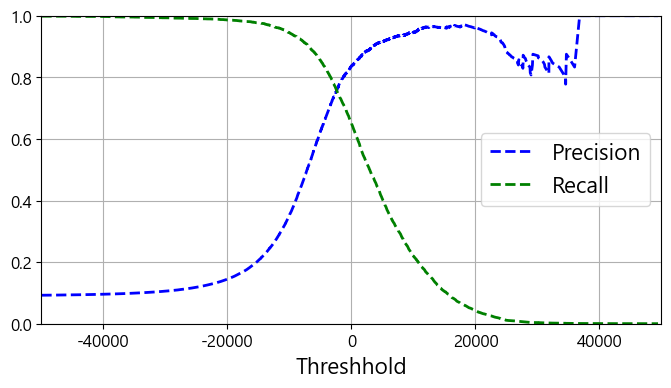

In [108]:
#정밀도 와 재현율에 대한 그래프 출력

#정밀도 와 재현율 트레이드 오프
from sklearn.metrics import precision_recall_curve
#정밀도, 재현율, 임계값을 전부 추출
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#정밀도 와 재현율 그래프를 그려주는 함수
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
    
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshhold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


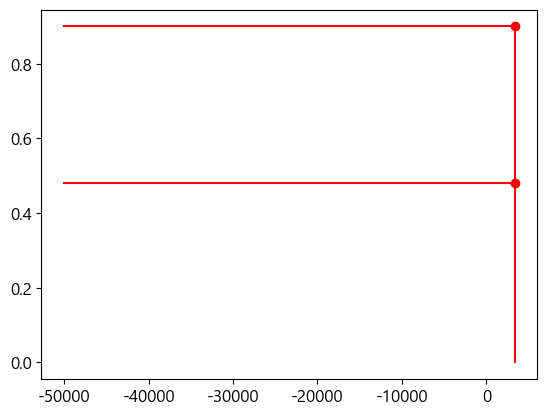

In [109]:
#정밀도가 0.9 되는 위치의 재현율 조회
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], "r")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r")
plt.plot([-50000, threshold_90_precision,], 
         [recall_90_precision, recall_90_precision], "r")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")

plt.show()

In [110]:
#정밀도가 0.9 가 되는 지점을 이용해서 예측
y_train_pred_90 = (y_scores >= threshold_90_precision)
#정밀도
print(precision_score(y_train_5, y_train_pred_90))
#재현율
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


## ROC = Receiver Operation Characteristic

In [33]:
from sklearn.metrics import roc_curve

#그래프에 사용할 값 계산
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #대각선 - 완전 랜덤인 경우
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
    plt.xlabel("True Positive Rate (Recall)", fontsize=16)
    plt.grid(True)
    
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.show()

NameError: name 'y_train_5' is not defined

## logistic regression 을 활용한 다중 class classification( cat)

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
#list(iris.keys())

In [11]:
X = iris['data'][:,(2,3)] #feature 생성
#print(X)

y = iris['target'] #종류가 3가지
#print(y)

In [9]:
from sklearn.linear_model import LogisticRegression
# 분류기 생성 및 훈련
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10, random_state = 42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [12]:
x1 = np.linspace(1,5,5)
y1 = np.linspace(6,10,5)

x2,y2 = np.meshgrid(x1, y1)
print(x2)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]


In [15]:
#sample data 생성
#linspace는 범위 안에 일정한 간격을 갖는 숫자 배열 생성
#linspace(0,1,5): [0,0.25,0.5,0.75,1.0]
#reshape는 shape 변경 -1 설정 = 나머지 전체
#meshgrid은 격자 좌표 생성
#x0은 500행 500열짜리 격자 
x0, x1 = np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1), 
    np.linspace(0,3.5,200).reshape(-1,1) #200,1로 reshape
)

In [29]:
#예측에 사용할 sample data
X_new = np.c_[x0.ravel(),x1.ravel()]

#sample data를 가지고 예측
y_predict = softmax_reg.predict(X_new)
print(y_predict)
#각 sample의 확률 조회
y_probs = softmax_reg.predict_proba(X_new)
print(y_probs)

[0 0 0 ... 2 2 2]
[[1.000e+00 3.761e-06 6.800e-20]
 [1.000e+00 4.059e-06 7.857e-20]
 [1.000e+00 4.380e-06 9.079e-20]
 ...
 [7.738e-23 1.037e-11 1.000e+00]
 [6.697e-23 9.684e-12 1.000e+00]
 [5.796e-23 9.044e-12 1.000e+00]]


## 선형 SVM을 사용한 이진 분류

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler


iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #feature는 2개만 사용
y = (iris['target'] == 2).astype(np.float64) #이진 분류를 수행하기 위해서 타겟 수정

#scaling & 훈련할 모델을 Pipieline으로 구성
#ML이나 데이터 처리 등을 할 때 Pipeline을 구성하는 것은 매우 중요
#Pipeline을 구성하지 않고 순차적으로 하나씩 해도 되지만 이런 경우 코드의 가독성이 떨어짐
svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge', random_state = 42))
])

#훈련
svm_clf.fit(X, y )

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [75]:
# 예측 1- 2번 class 맞음, 0 - 2번 class 아님
print(svm_clf.predict([5.5, 1.7]))

ValueError: Expected 2D array, got 1D array instead:
array=[5.5 1.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# 비선형 SVM

ValueError: Width and height specified must be non-negative

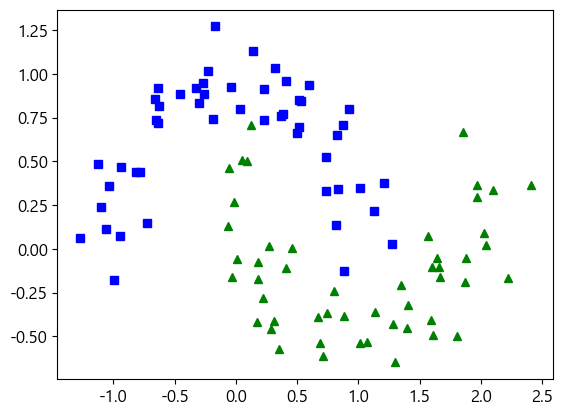

In [93]:
    from sklearn.datasets import make_moons
    X,y = make_moons(n_samples= 100, noise = 0.15, random_state= 42)

    def plot_dataset(X, y, axes):
        plt.plot(X[:,0][y== 0], X[:,1][y == 0],'bs')
        plt.plot(X[:,0][y == 1], X[:,1][y == 1],'g^')
        plt.axes(axes)
        plt.grid(True, which = 'both')
        plt.xlabel(r'$x_1$', fontsize = 20)
        plt.ylabel(r'$x_2$',fontsize = 20, rotation = 0)

    plot_dataset(X, y , [-1.5,2.5,-1,1.5])
    plt.show()

## 다중 커널

In [99]:
#비선형 SVM을 잉용해서 위의 데이터를 훈련
from sklearn.preprocessing import PolynomialFeatures

#degree 값을 높이면 차수가 높아져서 곡선이 복잡해짐
#너무 높게 설정하면 과적합 발생
polynomial_svm_clf = Pipeline([
    ('poly_feaures',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C = 10, loss = 'hinge', random_state= 42))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_feaures', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

ValueError: Width and height specified must be non-negative

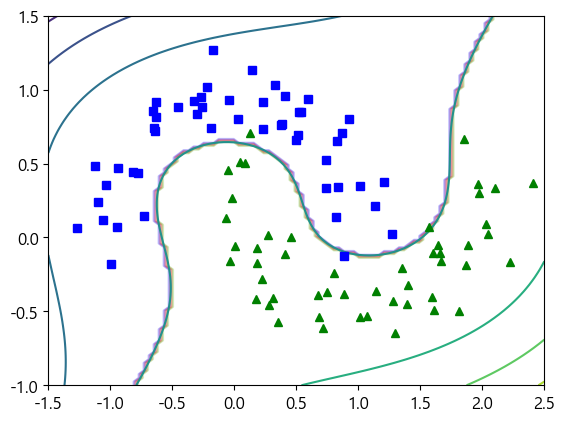

In [105]:
#결정 경계와 데이터의 분포를 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0],axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contour(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, cmape= plt.cm.brg, alph = 0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y, [-1.5,2.5, -1,1.5])
save_fig('moons_polynomial_svc_plot')
plt.show()

## gaussian RBF kernel을 이용한 비선형 SVM

ValueError: Width and height specified must be non-negative

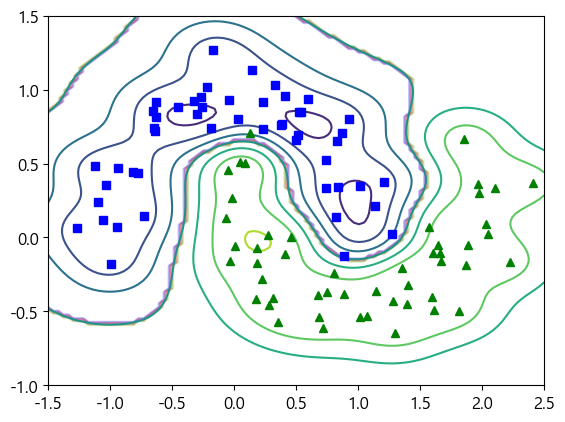

In [104]:
from sklearn.svm import SVC

rbf_kernel_svm_cls = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, random_state = 42))
])
rbf_kernel_svm_cls.fit(X,y)

plot_predictions(rbf_kernel_svm_cls, [-1.5,2.5,-1,1.5])
plot_dataset(X,y, [-1.5,2.5,-1,1.5])
plt.show()

# Decision Tree

## 분류 모델 생성 및 훈련 & 시각화

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:,(2,3)]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state= 42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [20]:
#conda install graphviz

In [21]:
#conda install pygraphviz

In [16]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

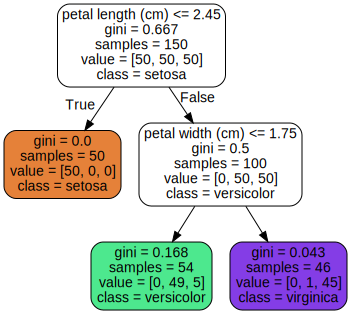

In [18]:
#windows 에서만 추가
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

with open('iris_tree.dot') as f:
    dot_graph = f.read()
    src = graphviz.Source(dot_graph)
src


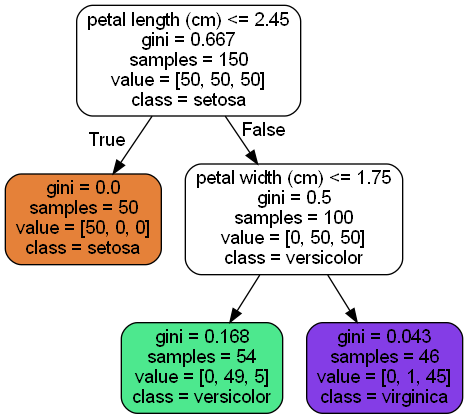

In [24]:
import pygraphviz as pga
from IPython.display import Image

graph = pga.AGraph('./iris_tree.dot')
graph.draw('iris_tree.png', prog = 'dot')
Image('iris_tree.png')

In [25]:
#예측
y_pred = tree_clf.predict([[5,1.5]])
#확률 예측
y_proba = tree_clf.predict_proba([[5,1.5]])
print(y_pred)
print(y_proba)

[1]
[[0.    0.907 0.093]]


In [ ]:
#feature의 중요도를 확인해서 중요하지 않은 feature를 제거하고 모델을 만들기도 하고
#중요하지 않은 feature들을 모아서 하나의 feature로 만들어서 모델의 정확도를 높이기도 함

d

## titanic data를 이용한 생존 여부 분류 - Decision Tree model

In [26]:
#data 가져오기
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
import pandas as pd

In [31]:
#결측치 처리
#deck - 결측치가 너무 많아서 열 제거 
#embark_town은 중복되서 제거 
rdf = df.drop(['deck', 'embark_town'], axis = 1)
#age - 결측치가 아주 많지 않기 때문에 결측치 데이터 제거
rdf = rdf.dropna(subset = ['age'], how = 'any', axis = 0)
#embarked - 결측치가 2개라서 최빈값으로 대체 
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax() 
rdf['embarked'].fillna(most_freq, inplace = True)

rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [32]:
rdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [34]:
#분석에 사용할 열 선택
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [37]:
#범주형 인자 확인 - 2개의 값만 존재
#범주형 일 때 확인 - 순서 여부를 확인
#순서가 없을 때는 원 핫 인코딩을 하고 순서가 있는 경우에는 
ndf['sex'].unique()

array(['male', 'female'], dtype=object)

In [38]:
#순서가 없으므로 원 핫 인코딩
onehot_sex = pd.get_dummies(ndf['sex'])
#print(onehot_sex)

#기존 데이터 프레임에 원 핫 인코딩 한 결과 추가
ndf = pd.concat([ndf, onehot_sex], axis =1 )
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked  female  male
0         0       3    male  22.0      1      0        S       0     1
1         1       1  female  38.0      1      0        C       1     0
2         1       3  female  26.0      0      0        S       1     0
3         1       1  female  35.0      1      0        S       1     0
4         0       3    male  35.0      0      0        S       0     1


In [39]:
#순서가 없으므로 원 핫 인코딩 - 앞에 town을 붙여서 컬럼 이름 생성
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix = 'town')
#print(onehot_sex)

#기존 데이터 프레임에 원 핫 인코딩 한 결과 추가
ndf = pd.concat([ndf, onehot_embarked], axis =1 )
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked  female  male  \
0         0       3    male  22.0      1      0        S       0     1   
1         1       1  female  38.0      1      0        C       1     0   
2         1       3  female  26.0      0      0        S       1     0   
3         1       1  female  35.0      1      0        S       1     0   
4         0       3    male  35.0      0      0        S       0     1   

   town_C  town_Q  town_S  
0       0       0       1  
1       1       0       0  
2       0       0       1  
3       0       0       1  
4       0       0       1  


In [41]:
#원 핫 인코딩 한 컬럼 제거
ndf.drop(['sex','embarked'], axis = 1, inplace = True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [44]:
#feature와 target 생성
X = ndf.iloc[:,1:]
y = ndf[['survived']]

#X.head()
#y.head()

In [46]:
#feature(독립 변수, 설명 별수)를 정규화
#feature들의 값 범위나 분포 차이가 많이 나는 경우 수행
from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)
X = preprocessing.StandardScaler().fit_transform(X)
print(X)

[[ 0.911 -0.53   0.525 ... -0.472 -0.202  0.533]
 [-1.476  0.572  0.525 ...  2.12  -0.202 -1.876]
 [ 0.911 -0.255 -0.552 ... -0.472 -0.202  0.533]
 ...
 [-1.476 -0.737 -0.552 ... -0.472 -0.202  0.533]
 [-1.476 -0.255 -0.552 ...  2.12  -0.202 -1.876]
 [ 0.911  0.159 -0.552 ... -0.472  4.95  -1.876]]


In [51]:
#훈련 데이터와 테스트 데이터를 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((499, 9), (215, 9))

In [61]:
#모델을 선택해서 훈련
from sklearn import tree
#불순도 지표는 entropy를 사용하고 중간 가지의 최대 개수는 5
tree_model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [64]:
#예측
y_hat = tree_model.predict(X_test)

#예측된 결과 확인
#print(y_hat[0:10])
#print(y_test.values[0:10])

In [63]:
#평가 지표 확인
from sklearn import metrics

#오차 행렬 출력
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

#나머지 평가 지표
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[109  17]
 [ 33  56]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       126
           1       0.77      0.63      0.69        89

    accuracy                           0.77       215
   macro avg       0.77      0.75      0.75       215
weighted avg       0.77      0.77      0.76       215



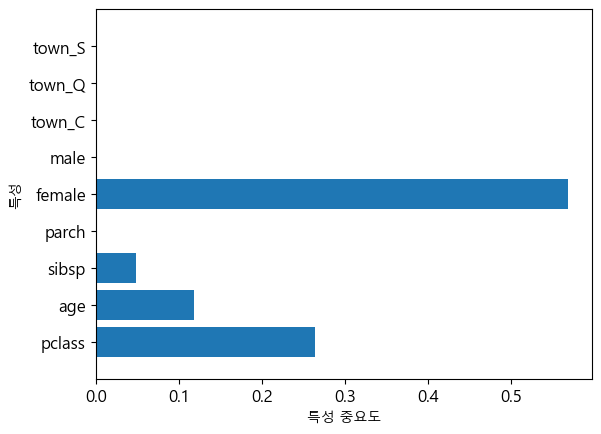

In [65]:
n_features = X.data.shape[1]

plt.barh(np.arange(n_features), tree_model.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features),
            ['pclass','age','sibsp','parch','female','male',
            'town_C','town_Q','town_S'])
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

In [66]:
#
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,4,6,8,10,12,16,20,24]
}
grid_cv = GridSearchCV(tree_model, param_grid = params, scoring = 'accuracy',
                        cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('best performance: ', grid_cv.best_score_)
print('best parameter: ', grid_cv.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
best performance:  0.8216767676767678
best parameter:  {'max_depth': 4}
